<a href="https://colab.research.google.com/github/belibirda00/HW-s/blob/main/TRAIN_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
train_data = pd.read_csv('data/train.csv', nrows = 10000000)
train_df = train_data.copy()

In [ ]:
lect_data = pd.read_csv('data/lectures.csv', sep=',')
lect_df = lect_data.copy()

In [ ]:
quest_data = pd.read_csv('data/questions.csv', sep=',')
quest_df = quest_data.copy()

In [ ]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


*row_id: (int64) идентификатор строки.*

*timestamp: (int64) время в миллисекундах между этим взаимодействием с пользователем и первым завершением события от этого пользователя.*

*user_id: (int32) ID-код пользователя.* 

*content_id: (int16) ID-код для взаимодействия с пользователем* 

*content_type_id: (int8) 0, если событием был вопрос, заданный пользователю, 1, если событием был просмотр пользователем лекции.* 

*task_container_id: (int16) Идентификационный код для пакета вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидит пояснения к любому из них. Все эти трое будут иметь общий идентификатор task_container_id.* 

*user_answer: (int8) ответ пользователя на вопрос, если он есть. Прочитайте -1 как ноль, для лекций.* 

*answer_correctly: (int8), если пользователь ответил правильно. Прочитайте -1 как ноль, для лекций.*

*prior_question_elapsed_time: (float32) Среднее время в миллисекундах, которое потребовалось пользователю, чтобы ответить на каждый вопрос в предыдущем наборе вопросов, игнорируя любые промежуточные лекции. Имеет значение null для первого набора вопросов пользователя или лекции. Обратите внимание, что время — это среднее время, затраченное пользователем на решение каждого вопроса в предыдущем наборе.* 

*prior_question_had_explanation: (bool) Видел ли пользователь объяснение и правильный ответ после ответа на предыдущий набор вопросов, игнорируя любые промежуточные лекции. Это значение является общим для одного пакета вопросов и равно нулю для первого пакета вопросов или лекции пользователя. Обычно первые несколько вопросов, которые видит пользователь, были частью диагностического теста на борту, где они не получали никакой обратной связи.*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 762.9+ MB


In [ ]:
#Преобразуем столбцы с ограниченным количеством значений к типу данных category
train_df['prior_question_had_explanation'] = train_df['prior_question_had_explanation'].astype('boolean')

In [ ]:
train_df.info()
#Объем занимаемой памяти уменьшился на 267 мб

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float64(1), int64(8)
memory usage: 705.7 MB


In [ ]:
train_df['user_id'].nunique()
# Количество студентов равно 39 491

39491

In [ ]:
train_df['content_type_id'].value_counts()
# Вопросами из 10 млн событий были 9 804 604 событий, просмотрами лекций - 195 396.

0    9804604
1     195396
Name: content_type_id, dtype: int64

In [ ]:
train_df['content_id'].nunique()
# Количество уникальных content_id равно 13 749

13749

In [ ]:
train_df[train_df['content_type_id'] == 0]['content_id'].nunique()
# 13 500 уникальных id вопросов

13500

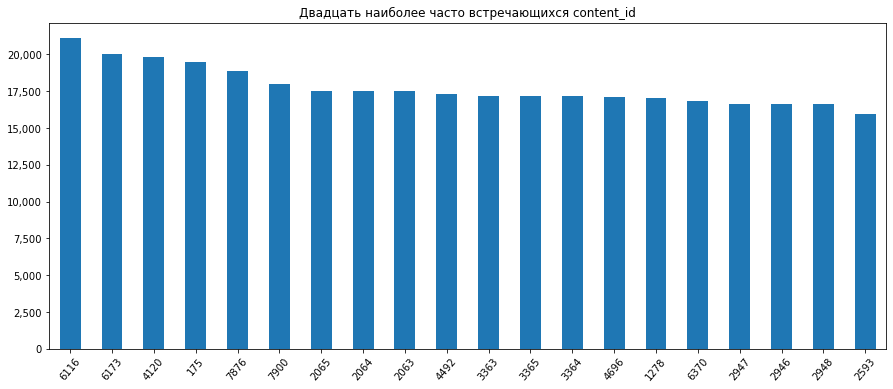

In [ ]:
cids = train_df['content_id'].value_counts()[:20]

fig = plt.figure(figsize=(15,6))
ax = cids.plot.bar()
plt.title('Двадцать наиболее часто встречающихся content_id')
plt.xticks(rotation=50)
ax.get_yaxis().set_major_formatter(lambda x, p: format(int(x), ','))
plt.show()

In [ ]:
train_df['task_container_id'].nunique()
# 10 000 уникальных кодов код для пакета вопросов или лекций

10000

In [ ]:
train_df['user_answer'].value_counts()
#Ответы студнетов на вопросы были в диапазоне от 0 до 3, -1 был просмотр лекции.

 0    2784028
 1    2660660
 3    2579528
 2    1780388
-1     195396
Name: user_answer, dtype: int64

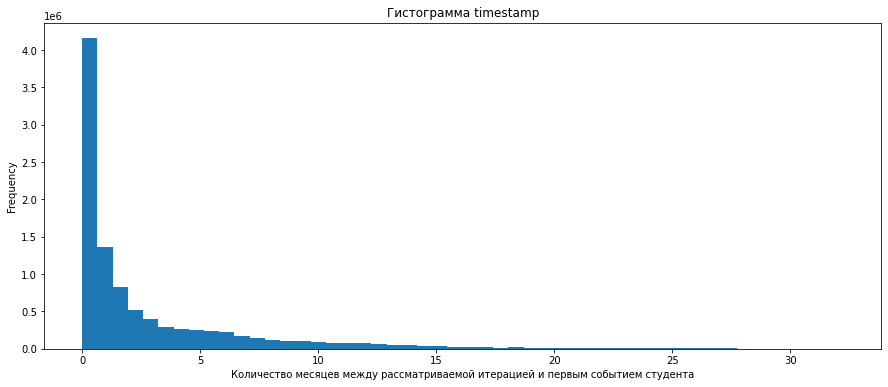

In [ ]:
#1 год = 31536000000 мс
ts = train_df['timestamp']/(31536000000/12)
fig = plt.figure(figsize=(15,6))
ts.plot.hist(bins=50)
plt.title('Гистограмма timestamp')
plt.xticks(rotation=0)
plt.xlabel('Количество месяцев между рассматриваемой итерацией и первым событием студента')
plt.show()

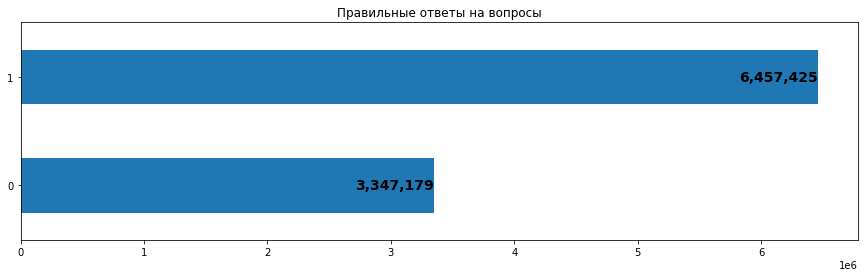

In [ ]:
correct = train_df[train_df['answered_correctly'] != -1]['answered_correctly'].value_counts(ascending=True)

fig = plt.figure(figsize=(15,4))
correct.plot.barh()
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='black', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title('Правильные ответы на вопросы')
plt.xticks(rotation=0)
plt.show()

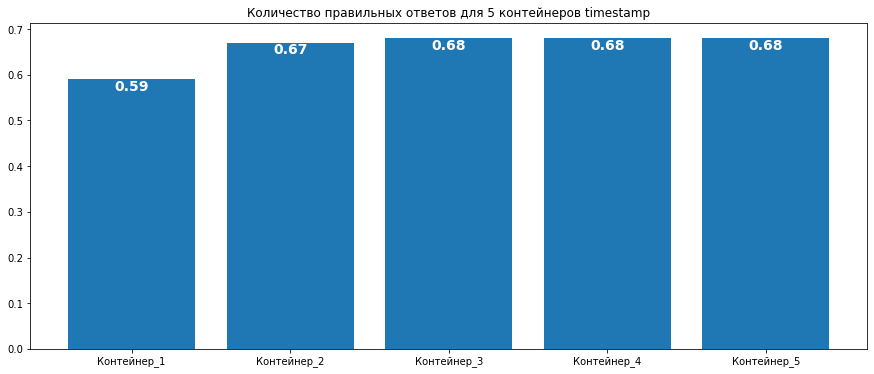

In [ ]:
#Разделим все значения timestamp на 5 контейнеров с помощью qcut
bin_labels_5 = ['Контейнер_1', 'Контейнер_2', 'Контейнер_3', 'Контейнер_4', 'Контейнер_5']
train_df['ts_bin'] = pd.qcut(train_df['timestamp'], q=5, labels=bin_labels_5)

#Создадим функцию, которая нам понадобится сейчас и в дальнейшем
def correct(field):
    correct = train_df[train_df['answered_correctly'] != -1].groupby([field, 'answered_correctly'], as_index=False).size()
    correct = correct.pivot(index= field, columns='answered_correctly', values='size')
    correct['Percent_correct'] = round(correct.iloc[:,1]/(correct.iloc[:,0] + correct.iloc[:,1]),2)
    correct = correct.sort_values(by = 'Percent_correct', ascending = False)
    correct = correct.iloc[:,2]
    return(correct)

bins_correct = correct('ts_bin')
bins_correct = bins_correct.sort_index()

fig = plt.figure(figsize=(15,6))
plt.bar(bins_correct.index, bins_correct.values)
for i, v in zip(bins_correct.index, bins_correct.values):
    plt.text(i, v, v, color='white', fontweight='bold', fontsize=14, va='top', ha='center')
plt.title('Количество правильных ответов для 5 контейнеров timestamp')
plt.xticks(rotation=0)
plt.show()

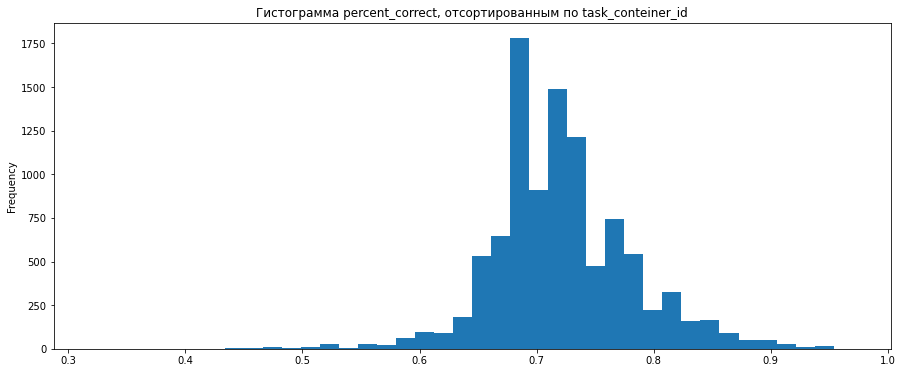

In [ ]:
task_id_correct = correct('task_container_id')

fig = plt.figure(figsize=(15,6))
task_id_correct.plot.hist(bins=40)
plt.title('Гистограмма percent_correct, отсортированным по task_conteiner_id')
plt.xticks(rotation=0)
plt.show()

In [ ]:
user_percent = train_df[train_df['answered_correctly'] != -1].groupby('user_id')['answered_correctly'].agg(Mean='mean', Answers='count')
user_percent['Answers'].max()
#Максимальное количество ответов, данное одним user_id = 15 562

15562

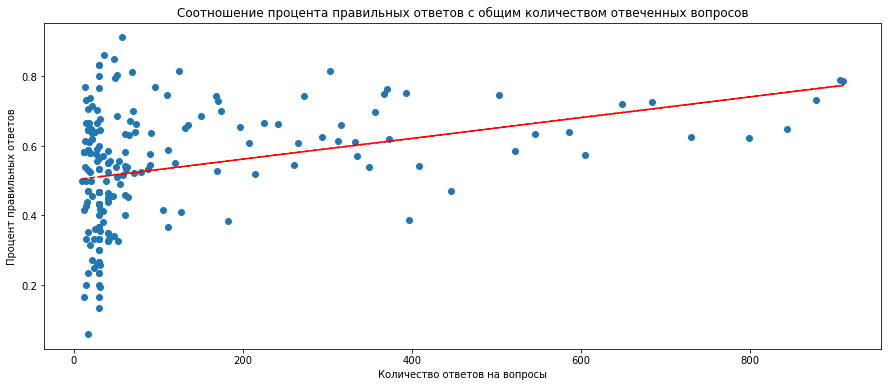

In [ ]:
user_percent = user_percent.query('Answers <= 1000').sample(n=200, random_state=1)

fig = plt.figure(figsize=(15,6))
x = user_percent.Answers
y = user_percent.Mean
plt.scatter(x, y, marker='o')
plt.title('Соотношение процента правильных ответов с общим количеством отвеченных вопросов')
plt.xticks(rotation=0)
plt.xlabel('Количество ответов на вопросы')
plt.ylabel('Процент правильных ответов')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [ ]:
#Сделаем то же самое для content_id
content_percent = train_df[train_df['answered_correctly'] != -1].groupby('content_id')['answered_correctly'].agg(Mean='mean', Answers='count')
display(content_percent['Answers'].max())
display(len(content_percent), len(content_percent[content_percent['Answers'] > 2100]))
#Максимальное количество вопросов, отвеченных по одному content_id составляет 21 103
#Из 13 500 content_id более 2 100 ответов на вопрос было в 757 content_id

21103

13500

757

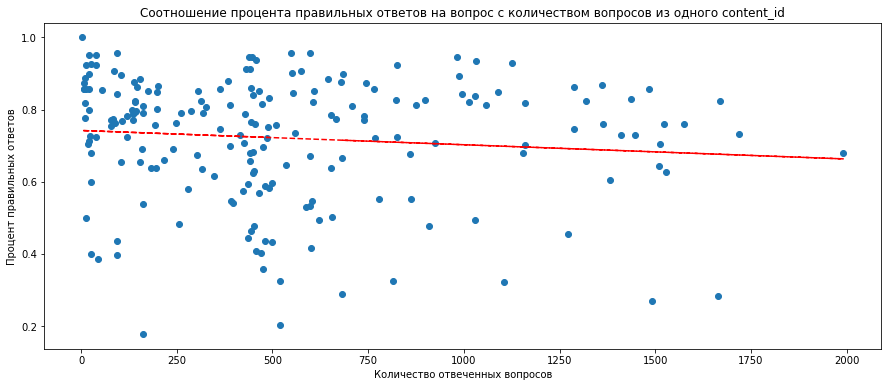

In [ ]:
content_percent = content_percent.query('Answers <= 2100').sample(n=200, random_state=1)

fig = plt.figure(figsize=(15,6))
x = content_percent.Answers
y = content_percent.Mean
plt.scatter(x, y, marker='o')
plt.title('Соотношение процента правильных ответов на вопрос с количеством вопросов из одного content_id')
plt.xticks(rotation=0)
plt.xlabel('Количество отвеченных вопросов')
plt.ylabel('Процент правильных ответов')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r--')

plt.show()

prior_question_had_explanation
False     909661
True     8855555
<NA>       39388
Name: (answered_correctly, count), dtype: int64

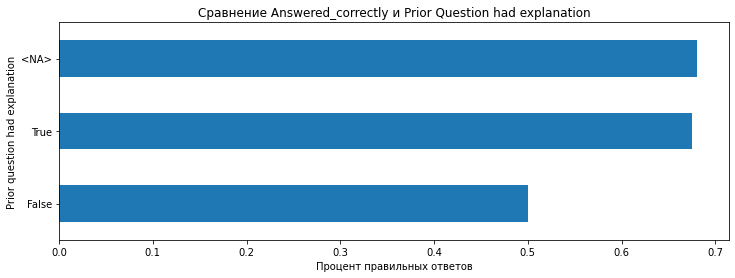

In [ ]:
pq = train_df[train_df['answered_correctly'] != -1].groupby(['prior_question_had_explanation'], dropna=False).agg({'answered_correctly': ['mean', 'count']})
display(pq.iloc[:,1])
pq = pq.iloc[:,0]

fig = plt.figure(figsize=(12,4))
pq.plot.barh()
plt.title('Сравнение Answered_correctly и Prior Question had explanation')
plt.xlabel('Процент правильных ответов')
plt.ylabel('Prior question had explanation')
plt.xticks(rotation=0)
plt.show()
#Процент правильных ответов примерно на 17% выше в случае, если prior_question_had_explanation был True, еще немного больше при значении NA

In [ ]:
pq = train_df[train_df['answered_correctly'] != -1]
pq = pq[['prior_question_elapsed_time', 'answered_correctly']]
pq = pq.groupby(['answered_correctly']).agg({'answered_correctly': ['count'], 'prior_question_elapsed_time': ['mean']})

pq
#prior_question_elapsed_time примерно равен в случае правильного ответа и наоборот

,answered_correctly,prior_question_elapsed_time
,count,mean
answered_correctly,,
0,3347179,25704.232108
1,6457425,25357.034974


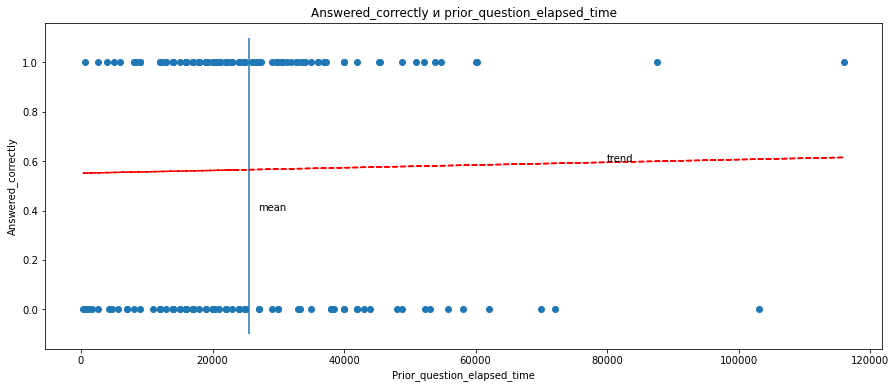

In [ ]:
mean_pq = train_df['prior_question_elapsed_time'].astype("float64").mean()

condition = ((train_df['answered_correctly'] != -1) & (train_df['prior_question_elapsed_time'].notna()))
pq = train_df[condition][['prior_question_elapsed_time', 'answered_correctly']].sample(n=200, random_state=1)
pq = pq.set_index('prior_question_elapsed_time').iloc[:,0]

fig = plt.figure(figsize=(15,6))
x = pq.index
y = pq.values
plt.scatter(x, y, marker='o')
plt.title('Answered_correctly и prior_question_elapsed_time')
plt.xticks(rotation=0)
plt.xlabel('Prior_question_elapsed_time')
plt.ylabel('Answered_correctly')
plt.vlines(mean_pq, ymin=-0.1, ymax=1.1)
plt.text(x= 27000, y=0.4, s='mean')
plt.text(x=80000, y=0.6, s='trend')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()
#Глобальный тренд выглядит восходящим

In [ ]:
quest_df.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [ ]:
quest_df.shape

(13523, 5)

In [ ]:
quest_df[quest_df['tags'].isna()]
#только один question_id имеем тег NaN

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [ ]:
quest_df['tags'] = quest_df['tags'].astype(str)

tags = [x.split() for x in quest_df[quest_df['tags'] != "nan"].tags.values]
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)

len(tags)
#188 различных тегов

188

In [ ]:
#Узнаем, как много правильных и неправильных ответов было на каждый question_id
#tags_list = [x.split() for x in quest_df['tags'].values]
quest_df['tags'] = tags_list
quest_df.head()

correct = train_df[train_df['answered_correctly'] != -1].groupby(["content_id", 'answered_correctly'], as_index=False).size()
correct = correct.pivot(index= "content_id", columns='answered_correctly', values='size')
correct.columns = ['Wrong', 'Right']
correct = correct.fillna(0)
correct[['Wrong', 'Right']] = correct[['Wrong', 'Right']].astype(int)
quest_df = quest_df.merge(correct, left_on = "question_id", right_on = "content_id", how = "left")
quest_df.head()

,question_id,bundle_id,correct_answer,part,tags,Wrong,Right
0,0,0,0,1,"[51, 131, 162, 38]",63.0,628.0
1,1,1,1,1,"[131, 36, 81]",77.0,649.0
2,2,2,0,1,"[131, 101, 162, 92]",1970.0,2531.0
3,3,3,0,1,"[131, 149, 162, 29]",500.0,1776.0
4,4,4,3,1,"[131, 5, 162, 38]",1173.0,1980.0


In [ ]:
quest_df['tags'].values

array([list(['51', '131', '162', '38']), list(['131', '36', '81']),
       list(['131', '101', '162', '92']), ..., list(['73']),
       list(['125']), list(['55'])], dtype=object)

In [ ]:
tags_df = pd.DataFrame()
for x in range(len(tags)):
    df = quest_df[quest_df['tags'].apply(lambda l: tags[x] in l)]
    df1 = df.agg({'Wrong': ['sum'], 'Right': ['sum']})
    df1['Total_questions'] = df1.Wrong + df1.Right
    df1['Question_ids_with_tag'] = len(df)
    df1['tag'] = tags[x]
    df1 = df1.set_index('tag')
    tags_df = tags_df.append(df1)

tags_df[['Wrong', 'Right', 'Total_questions']] = tags_df[['Wrong', 'Right', 'Total_questions']].astype(int)
tags_df['Percent_correct'] = tags_df.Right/tags_df.Total_questions
tags_df = tags_df.sort_values(by = "Percent_correct")

tags_df.head()

C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarn

C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarn

C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarn

C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarn

C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\vitek\AppData\Local\Temp\ipykernel_5804\1387603164.py:9: FutureWarn

,Wrong,Right,Total_questions,Question_ids_with_tag,Percent_correct
tag,,,,,
24,15523,9653,25176,17,0.383421
23,25673,20228,45901,11,0.440688
19,17267,13833,31100,57,0.444791
151,26954,25882,52836,16,0.489855
108,23213,23511,46724,20,0.503189


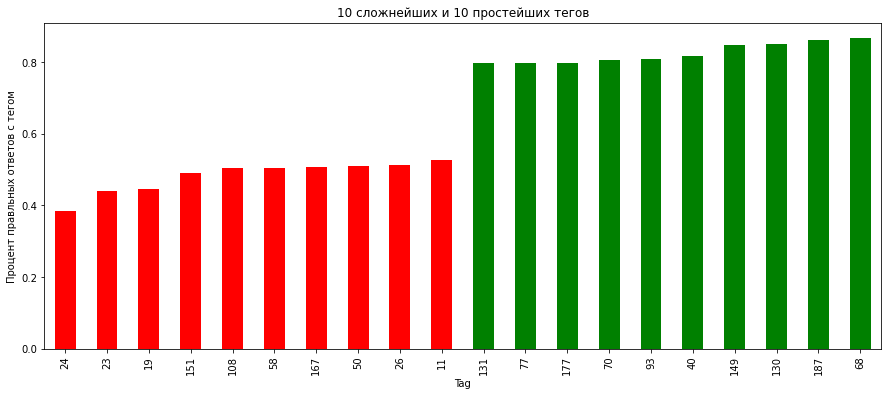

In [ ]:
select_rows = list(range(0,10)) + list(range(178, len(tags_df)))
tags_select = tags_df.iloc[select_rows,4]

fig = plt.figure(figsize=(15,6))
x = tags_select.index
y = tags_select.values
clrs = ['red' if y < 0.6 else 'green' for y in tags_select.values]
tags_select.plot.bar(x, y, color=clrs)
plt.title('10 сложнейших и 10 простейших тегов')
plt.xlabel('Tag')
plt.ylabel('Процент правльных ответов с тегом')
plt.xticks(rotation=90)
plt.show()

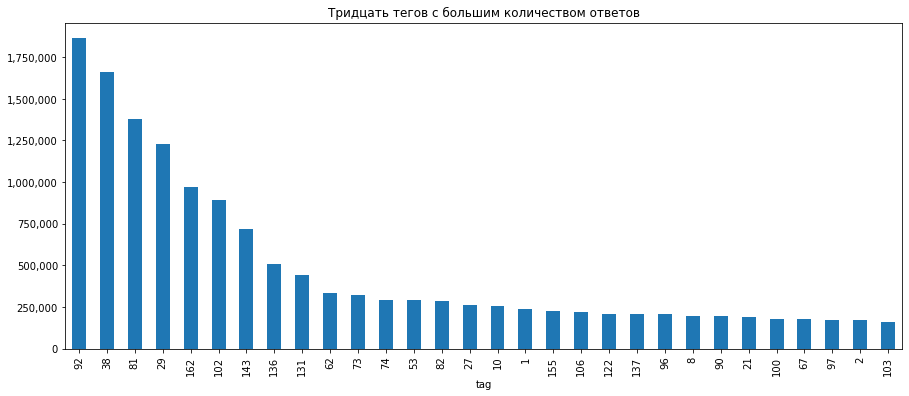

In [ ]:
tags_select = tags_df.sort_values(by = "Total_questions", ascending = False).iloc[:30,:]
tags_select = tags_select["Total_questions"]

fig = plt.figure(figsize=(15,6))
ax = tags_select.plot.bar()
plt.title("Тридцать тегов с большим количеством ответов")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(lambda x, p: format(int(x), ','))
plt.show()

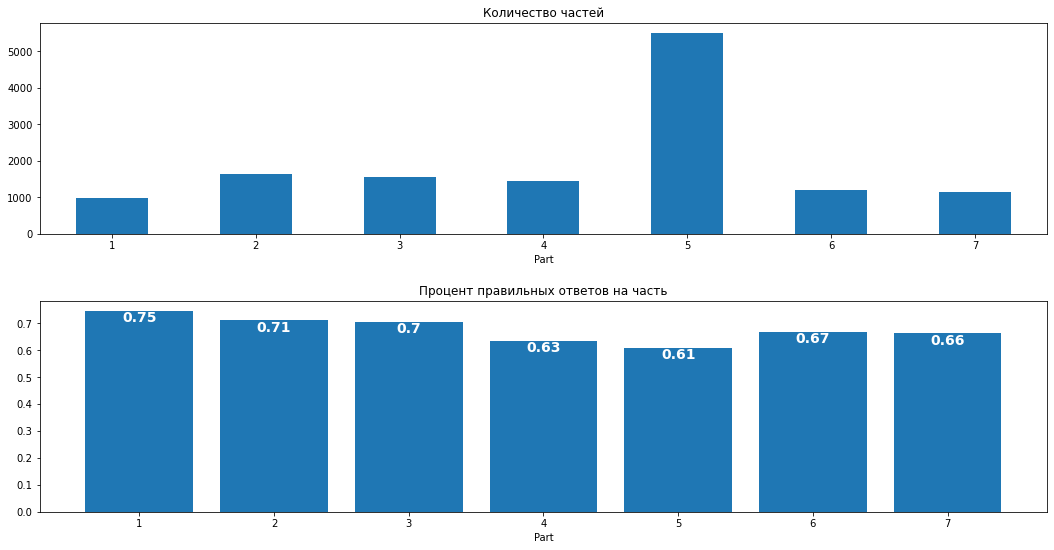

In [ ]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
ax1 = quest_df.groupby("part").count()['question_id'].plot.bar()
plt.title("Количество частей")
plt.xlabel("Part")
plt.xticks(rotation=0)

part = quest_df.groupby('part').agg({'Wrong': ['sum'], 'Right': ['sum']})
part['Percent_correct'] = part.Right/(part.Right + part.Wrong)
part = part.iloc[:,2]

ax2 = fig.add_subplot(212)
plt.bar(part.index, part.values)
for i, v in zip(part.index, part.values):
    plt.text(i, v, round(v,2), color='white', fontweight='bold', fontsize=14, va='top', ha='center')

plt.title("Процент правильных ответов на часть")
plt.xlabel("Part")
plt.xticks(rotation=0)
plt.tight_layout(pad=2)
plt.show()

In [ ]:
lect_df.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [ ]:
lect_df.shape[0]
#418 lecture_id

418

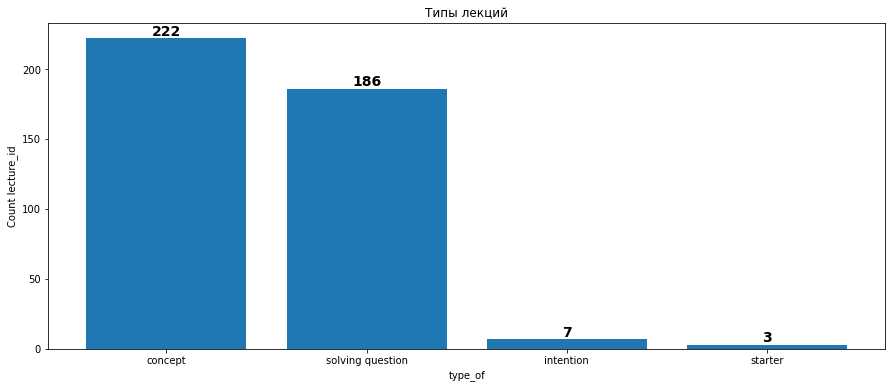

In [ ]:
lect_type_of = lect_df['type_of'].value_counts()

fig = plt.figure(figsize=(15,6))
plt.bar(lect_type_of.index, lect_type_of.values)
for i, v in zip(lect_type_of.index, lect_type_of.values):
    plt.text(i, v, v, color='black', fontweight='bold', fontsize=14, va='bottom', ha='center')
plt.title("Типы лекций")
plt.xlabel("type_of")
plt.ylabel("Count lecture_id")
plt.xticks(rotation=0)
plt.show()

False    24467
True     15024
Name: Watches_lecture, dtype: int64


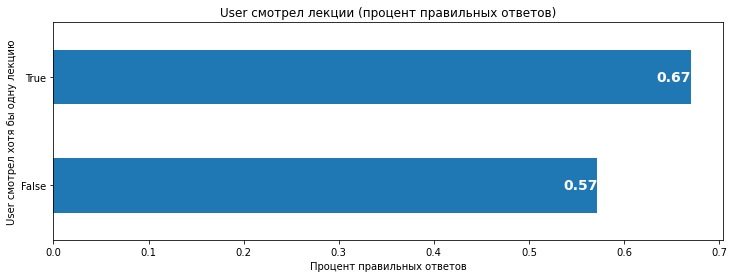

In [ ]:
user_lect = train_df.groupby(["user_id", "answered_correctly"]).size().unstack()
user_lect.columns = ['Lecture', 'Wrong', 'Right']
user_lect['Lecture'] = user_lect['Lecture'].fillna(0)
user_lect = user_lect.astype('Int64')
user_lect['Watches_lecture'] = np.where(user_lect.Lecture > 0, True, False)

watches_l = user_lect.groupby("Watches_lecture").agg({'Wrong': ['sum'], 'Right': ['sum']})
print(user_lect.Watches_lecture.value_counts())

watches_l['Percent_correct'] = watches_l.Right/(watches_l.Right + watches_l.Wrong)

watches_l = watches_l.iloc[:,2]

fig = plt.figure(figsize=(12,4))
watches_l.plot.barh()
for i, v in zip(watches_l.index, watches_l.values):
    plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')

plt.title("User смотрел лекции (процент правильных ответов)")
plt.xlabel("Процент правильных ответов")
plt.ylabel("User смотрел хотя бы одну лекцию")
plt.xticks(rotation=0)
plt.show()

In [ ]:
batch_lect = train_df.groupby(["task_container_id", "answered_correctly"]).size().unstack()
batch_lect.columns = ['Lecture', 'Wrong', 'Right']
batch_lect['Lecture'] = batch_lect['Lecture'].fillna(0)
batch_lect = batch_lect.astype('Int64')
batch_lect['Percent_correct'] = batch_lect.Right/(batch_lect.Wrong + batch_lect.Right)
batch_lect['Percent_lecture'] = batch_lect.Lecture/(batch_lect.Lecture + batch_lect.Wrong + batch_lect.Right)
batch_lect = batch_lect.sort_values(by = "Percent_lecture", ascending = False)

batch_lect.Lecture.max()
#Максимальное количество лекций, просморенных с одним task_container_id 523

523

In [ ]:
batch_lect.head()

,Lecture,Wrong,Right,Percent_correct,Percent_lecture
task_container_id,,,,,
9651,2,4,10,0.714286,0.125
9034,2,5,12,0.705882,0.105263
9785,2,3,15,0.833333,0.1
8409,2,6,13,0.684211,0.095238
9596,2,10,9,0.473684,0.095238


In [ ]:
batch_lect['Has_lecture'] = np.where(batch_lect.Lecture == 0, False, True)
#Есть 5979 task_container_id с лекциями и 4021 без лекций
display(batch_lect[batch_lect.Has_lecture == True].shape[0])
display(batch_lect[batch_lect.Has_lecture == False].shape[0])

5979

4021

In [ ]:
batch_lect = batch_lect[['Wrong', 'Right', 'Has_lecture']]
batch_lect = batch_lect.groupby("Has_lecture").sum()
batch_lect['Percent_correct'] = batch_lect.Right/(batch_lect.Wrong + batch_lect.Right)
batch_lect = batch_lect[['Percent_correct']]
batch_lect

,Percent_correct
Has_lecture,
False,0.735944
True,0.656856
